# Введение

**Машинное обучение — это подраздел искусственного интеллекта, который фокусируется на разработке алгоритмов и моделей, способных обучаться на основе данных. Основная идея заключается в том, чтобы создать системы, которые могут адаптироваться и улучшаться без явного программирования.** *Сгенировал Chatgpt

*Какие есть типы задач машинного обучения*

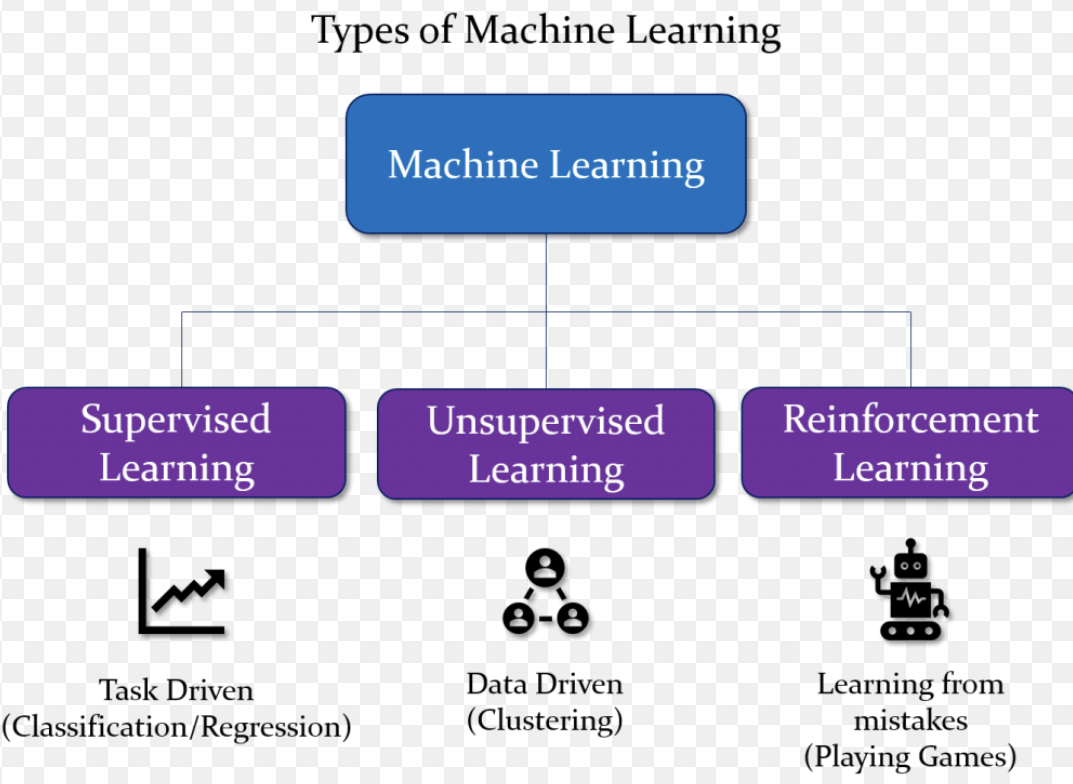

**Типы задач**

**Основных типов задач три\
1) Регрессия\
2) Классификация\
3) Ранжирование**

# Линейная регрессия

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

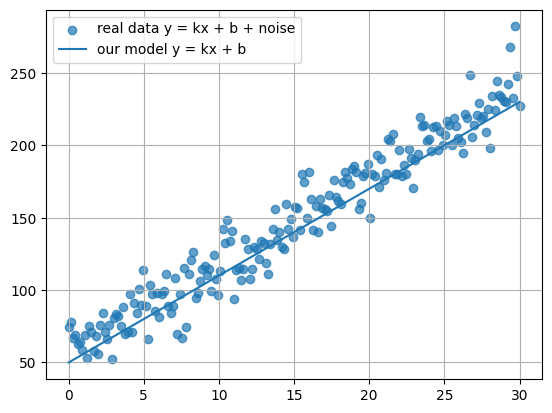

In [ ]:
x = np.linspace(0,30, 200)
b = 50
w = 6
y = w * x + b + np.random.normal(8, 13, size = 200)

plt.grid(True)
plt.scatter(x, y, label = 'real data y = kx + b + noise', alpha = 0.7)
plt.plot(x, w * x + b, label = 'our model y = kx + b')
plt.legend()
plt.show()

**Как найти нужное преобразование из x -> y?**



*Рассмотрим метод наименьших квадратов*





 ****\begin{align}
\mathbf y_i = \sum_{j=1}^n w_j * x_j + b
\\||min(y - \sum_{j=1}^n w_j * x_j + b)||
\end{align}****

У - объясняемая (или целевая) переменная;\
w - вектор параметров модели (в машинном обучении эти параметры часто называют весами или фичами);\
Х - матрица наблюдений\
b - отступ

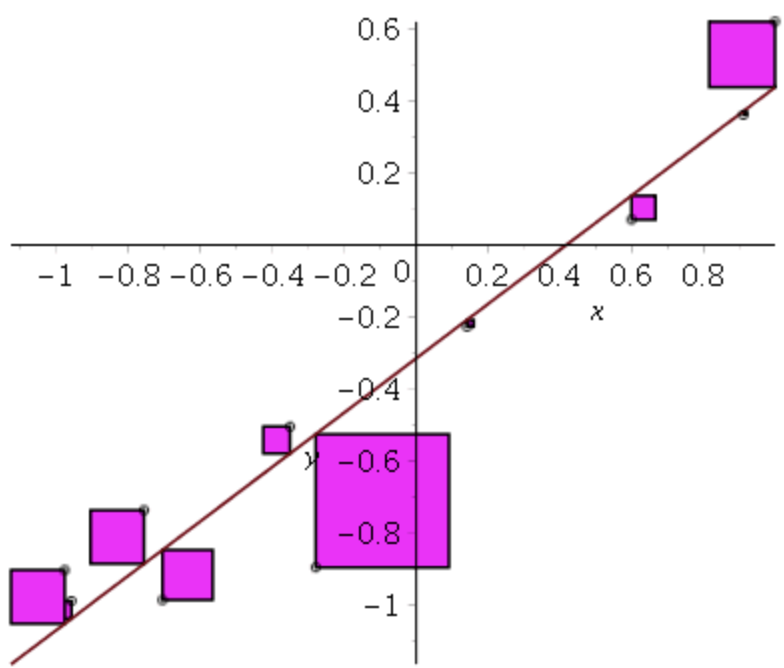

*Давайте для нахождения преобразования 'минимизировать наши квадратики. Формально это выглядит как нахождения минимума следующей функции. Ее называют лосс функцией*

\begin{align}
\mathbf{L(w)} = \sum_{i=1}^n (y - y_i)^2 =  \sum_{i=1}^n (y - (w * X + b))^2
\end{align}

*Как искать минимум? Способов много, но основной из них это градиетный спуск*

\begin{align}
\mathbf{w_i} = w_{i-1} - \alpha * L'(w)
\end{align}
$\alpha$ - learning rate

**Как оценить качество модели? Для этого существует ряд метрик. Поговорим про основные из них.**

\begin{align}
\mathbf{MSE} = \frac{1}{N}\sum_{i=1}^n (y - y_i)^2 =\frac{1}{N}\sum_{i=1}^n (y - (w * X + b))^2
\end{align}

\begin{align}
\mathbf{RMSE} = \sqrt{\frac{1}{N}\sum_{i=1}^n (y - y_i)^2}
\end{align}

\begin{align}
\mathbf{MAE} = \frac{1}{N}\sum_{i=1}^n |(y - y_i)|
\end{align}

\begin{align}
\mathbf{MAPE} = \frac{1}{N}\sum_{i=1}^n |\frac{(y - y_i)}{y}|
\end{align}

\begin{align}
\mathbf{R^2} = 1 - \frac{\sum_{i=1}^n (y - y_i)^2}{y_i - y^-}
\end{align}

## Переходим к практике :)




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel('/content/значения Англ.xlsx', index_col = '№')
data = data.rename(columns={'Chloride content, mg/dm3 ': 'Chloride content', 'Sulfate content, mg/dm3 ' : 'Sulfate content', 'Compressive strength, MPa':'Compressive strength'})
data.head()

,Number of freeze-thaw cycles,Chloride content,Sulfate content,Number of wet-dry cycles,Compressive strength
№,,,,,
1,0,0,0.0,0,58.2
2,1,650,450.0,1,57.8
3,1,650,451.0,1,57.7
4,2,651,451.0,2,57.6
5,2,651,451.0,3,57.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 600
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of freeze-thaw cycles  600 non-null    int64  
 1   Chloride content              600 non-null    int64  
 2   Sulfate content               600 non-null    float64
 3   Number of wet-dry cycles      600 non-null    int64  
 4   Compressive strength          600 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 28.1 KB


In [ ]:
data.describe()

,Number of freeze-thaw cycles,Chloride content,Sulfate content,Number of wet-dry cycles,Compressive strength
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,124.075000,773.086667,620.591254,248.843333,41.496267
std,71.717816,78.413798,83.040296,148.570648,8.598902
min,0.000000,0.000000,0.000000,0.000000,28.500000
25%,61.000000,714.750000,563.750000,119.750000,34.000000
50%,120.000000,768.000000,626.000000,237.500000,40.200000
75%,187.250000,836.000000,690.250000,372.250000,48.725000
max,250.000000,900.000000,750.000000,500.000000,58.200000


In [ ]:
data.isnull().sum()

Number of freeze-thaw cycles    0
Chloride content                0
Sulfate content                 0
Number of wet-dry cycles        0
Compressive strength            0
dtype: int64

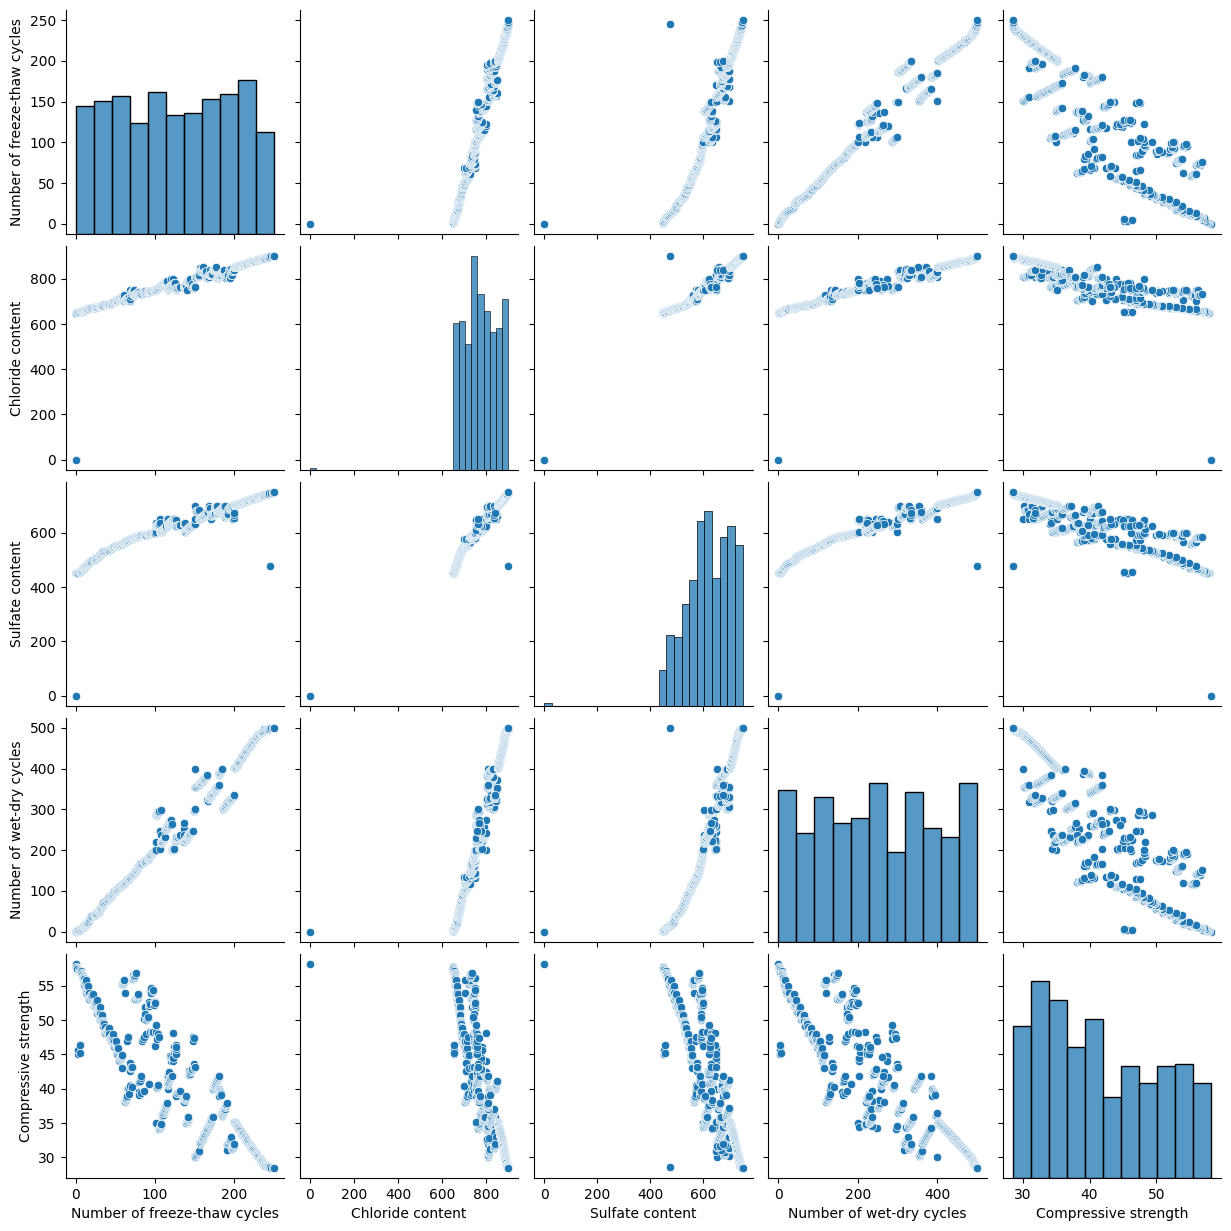

In [ ]:
sns.pairplot(data)

## Мультиколлиниарность

\begin{align}
\mathbf{L(w)} = \sum_{i=1}^n (y - y_i)^2 =  ||(y - X*w)||^2 = (y - X*w)^T(y - X*w)
\end{align}

:\begin{align}
'откуда' \omega = (X^TX)^{-1}X^Ty
\end{align}

In [ ]:
X = data.drop('Compressive strength', axis = 1)
y = data['Compressive strength']

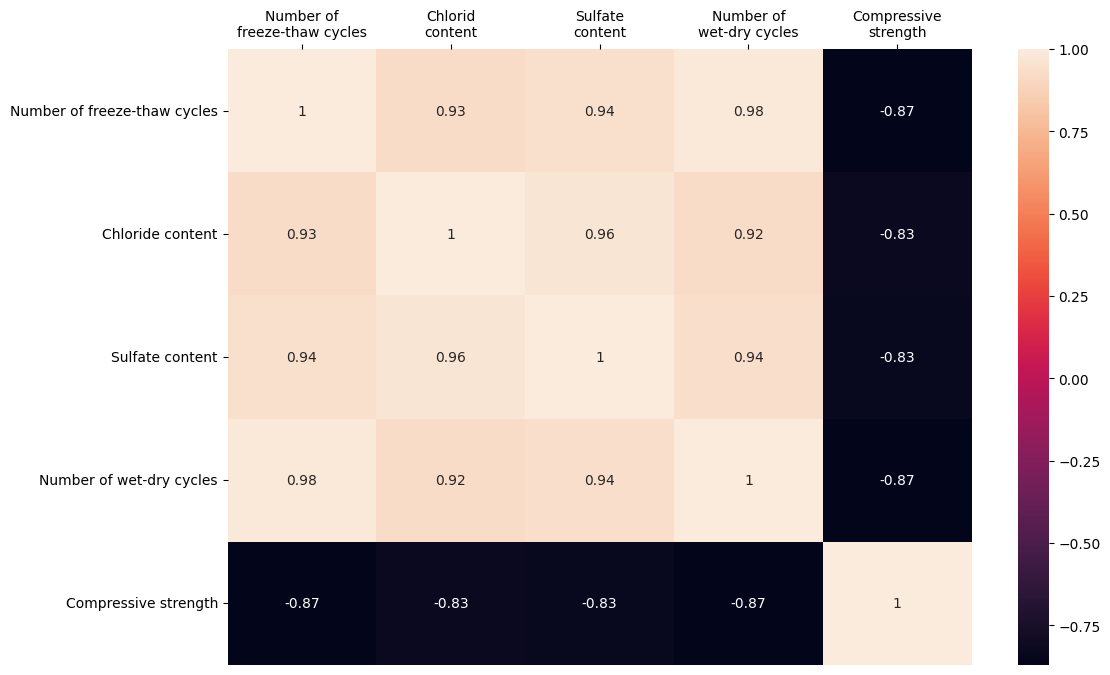

In [ ]:
corr = data.corr()
plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True, xticklabels = ['Number of\nfreeze-thaw cycles', 'Chlorid\ncontent', 'Sulfate\ncontent', 'Number of\nwet-dry cycles', 'Compressive\nstrength'])
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 41)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_train = model.predict(X_train)
print('train mse = {}'.format(mse(pred_train, y_train)))

train mse = 17.22331957155326


In [ ]:
pred_test = model.predict(X_test)
print('test mse = {}'.format(mse(pred_test, y_test)))

test mse = 17.607317164790228


In [ ]:
model.intercept_

60.89421828922562

In [ ]:
linear_r2 = r2(model.predict(X_test), y_test)

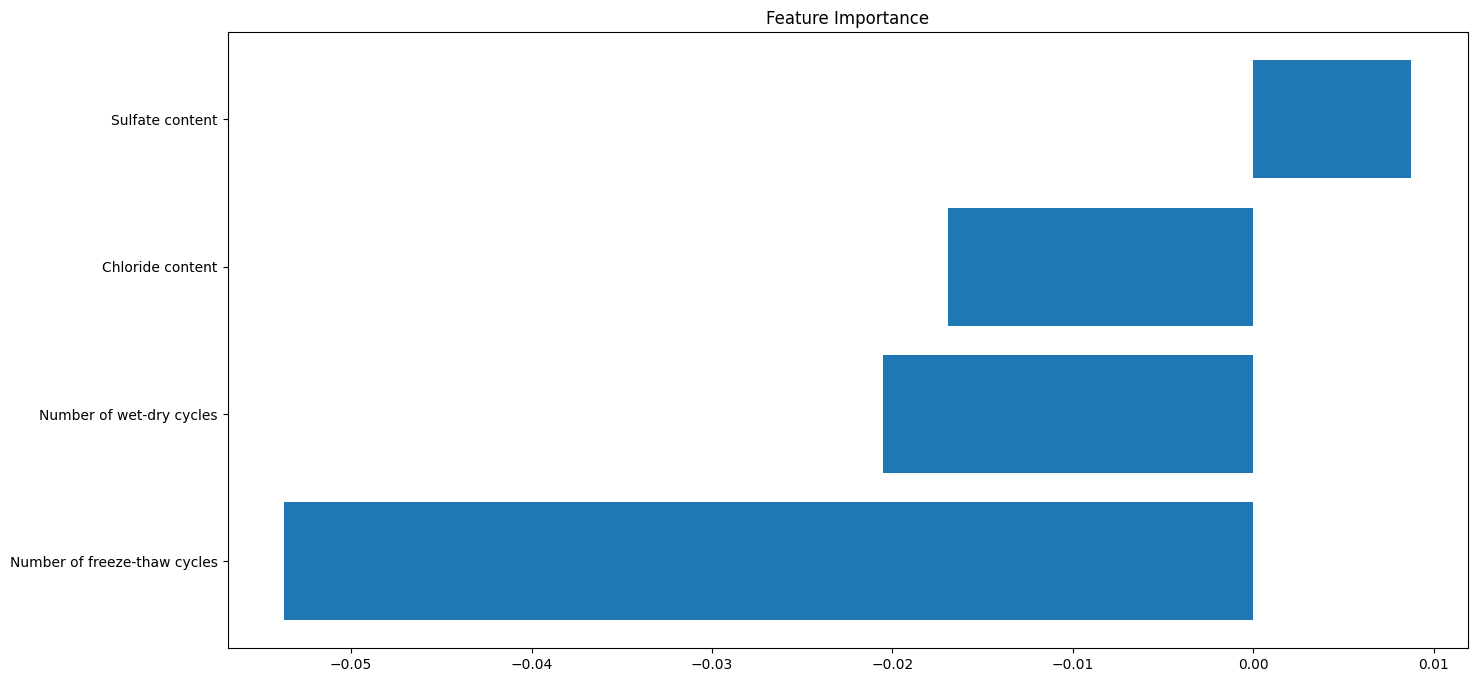

In [ ]:
feature_importance = model.coef_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(16, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

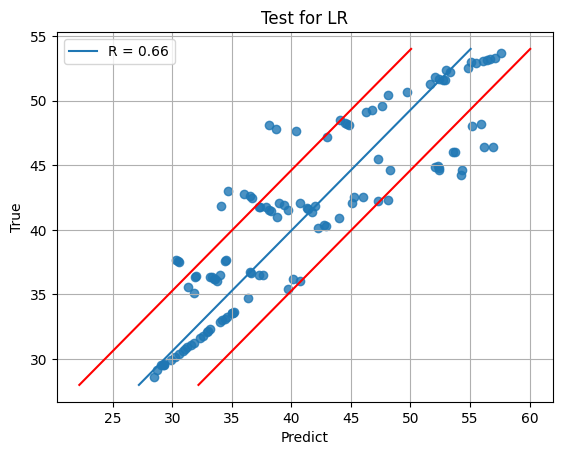

In [ ]:
scatter = LinearRegression()

plt.scatter(y_test, model.predict(X_test), alpha = 0.8)
plt.grid(True)

plt.title('Test for LR')
plt.xlabel('Predict')
x = np.linspace(28, 54, 1000)
scatter.fit(np.array([model.predict(X_test)]).T, y_test)
plt.ylabel('True')
plt.plot(scatter.coef_ * x + scatter.intercept_, x, label = 'R = {}'.format(round(linear_r2,2)))

plt.plot(scatter.coef_ * x + scatter.intercept_+5, x, color = 'r')
plt.plot(scatter.coef_ * x + scatter.intercept_ -5, x,  color = 'r')

plt.legend()
plt.show()

## Другие виды регресии

Основное отличие, что Lasso использует l1 регулиразацию, а Ridge регуляризацию Тихонова (l2) в loss function

\begin{align}
\mathbf{l1} = \sqrt{\frac{1}{N}\sum_{i=1}^n (y - y_i)^2} + \alpha * ||w||
\end{align}

\begin{align}
\mathbf{l2} = \sqrt{\frac{1}{N}\sum_{i=1}^n (y - y_i)^2} + \alpha * ||w||^2
\end{align}

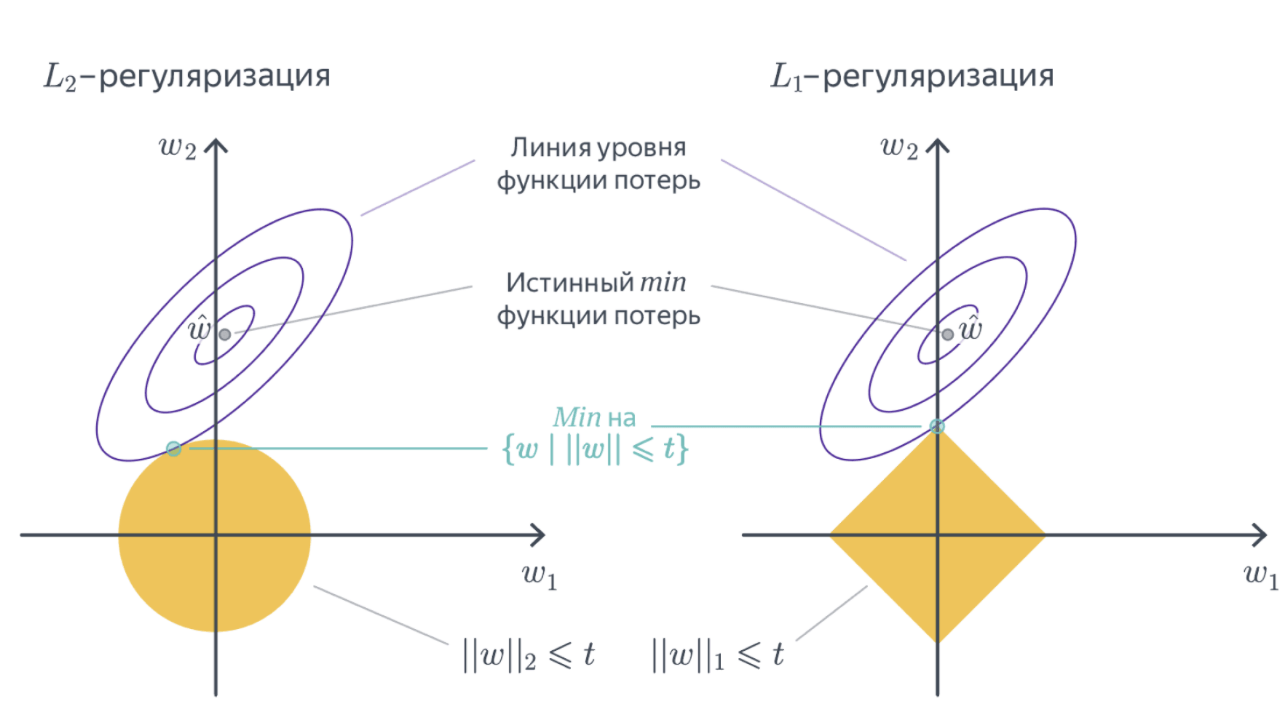

В качестве дз примените сами Lasso и Ridge регрессию.

# Немного про классификацию

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

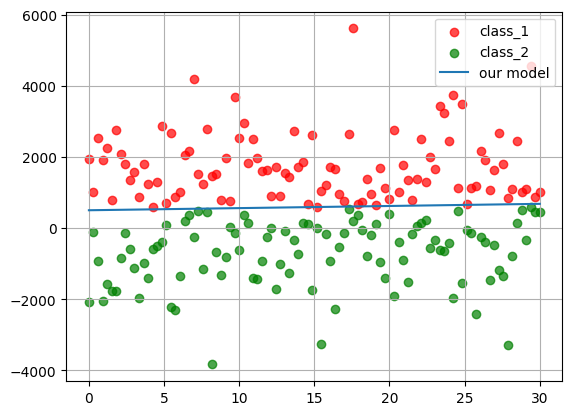

In [ ]:
x = np.linspace(0,30, 100)
b = 500
w = 6
class_1 = w * x + b + abs(np.random.normal(90, 1500, size = 100))

plt.grid(True)
class_2 = w * x + b - abs(np.random.normal(90, 1500, size = 100))

plt.scatter(x, class_1, label = 'class_1', alpha = 0.7, color = 'r')
plt.scatter(x, class_2, label = 'class_2', alpha = 0.7, color = 'g')

plt.plot(x, 6 * x + b, label = 'our model')
plt.legend()
plt.show()

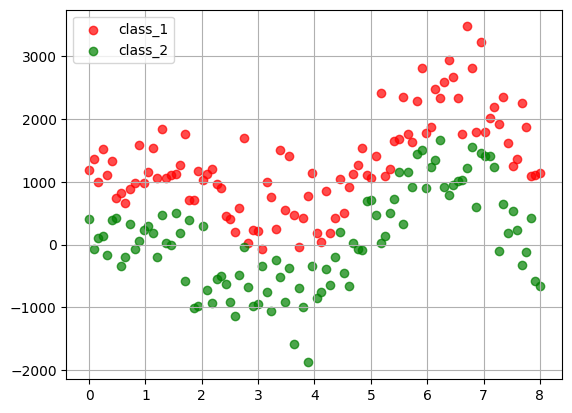

In [ ]:
x = np.linspace(0,8, 100)
b = 500
w = 6
class_1 = x * 200 * np.cos(x) + b + abs(np.random.normal(90, 700, size = 100))

plt.grid(True)
class_2 = x * 200 * np.cos(x) +  b - abs(np.random.normal(90, 700, size = 100))

plt.scatter(x, class_1, label = 'class_1', alpha = 0.7, color = 'r')
plt.scatter(x, class_2, label = 'class_2', alpha = 0.7, color = 'g')

plt.legend()
plt.show()

Давайте искать вероятность классов. Используем для этого сигмоиду.




\begin{align}
\mathbf{σ} = \frac{1}{1 + e^{-w*X}}
\end{align}

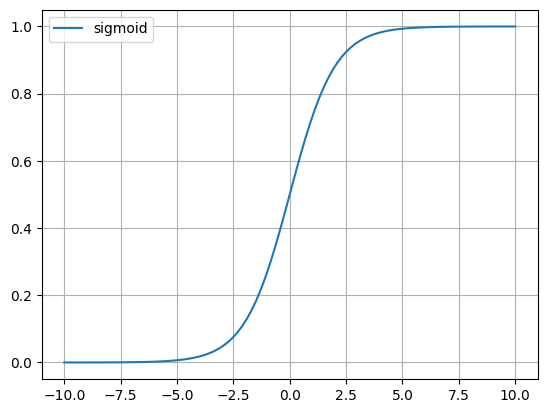

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
plt.grid(True)
plt.plot(x, y, label = 'sigmoid')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame()
df['x'] =  np.concatenate([class_1, class_2])
df['y'] = np.concatenate([[0] * len(x), [1] * len(x)])

In [ ]:
df

,x,y
0,1371.235039,0
1,823.209625,0
2,1756.613411,0
3,758.011188,0
4,1158.448074,0
...,...,...
195,1641.398630,1
196,1076.903759,1
197,1509.287584,1
198,1044.067463,1


In [ ]:
log = LogisticRegression()
log.fit(np.array(df['x']).reshape(-1,1), df['y'])

LogisticRegression()

In [ ]:
linear = RidgeClassifier()
linear.fit(np.array(df['x']).reshape(-1,1), df['y'])

RidgeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(log.predict(np.array(df['x']).reshape(-1,1)), df['y'])

0.79

In [ ]:
accuracy_score(linear.predict(np.array(df['x']).reshape(-1,1)), df['y'])

0.79

# Нелинейная **регрессия**

In [2]:
from sklearn.preprocessing import PolynomialFeatures

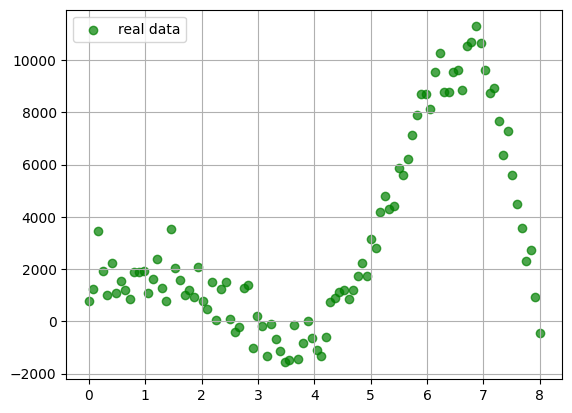

In [3]:
x = np.linspace(0,8, 100)
b = 500
w = 6
y = x * x * 200 * np.cos(x) + 8*x + b + abs(np.random.normal(700, 1000, size = 100))

plt.grid(True)

plt.scatter(x, y, label = 'real data', alpha = 0.7, color = 'g')

plt.legend()
plt.show()

In [4]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y

In [5]:
model = LinearRegression()

In [6]:
model = LinearRegression()
model.fit(np.array(df['x']).reshape(-1,1), df['y'])

LinearRegression()

In [ ]:
mse(model.predict(np.array(df['x']).reshape(-1,1)),df['y'])

7521357.467005974

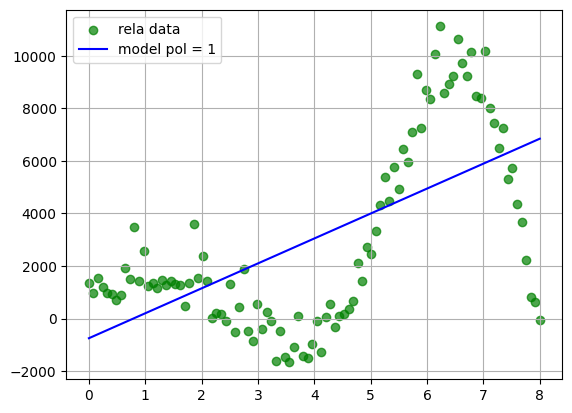

In [7]:
x = np.linspace(0,8, 100)
b = 500
w = 6
y = x * x * 200 * np.cos(x) + 8*x + b + abs(np.random.normal(700, 1000, size = 100))

plt.grid(True)

plt.scatter(x, y, label = 'rela data', alpha = 0.7, color = 'g')

plt.plot(x, model.predict(np.array(x).reshape(-1,1)), label = 'model pol = 1', color = 'b')

plt.legend()
plt.show()

In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(x.reshape(-1, 1))

In [9]:
model.fit(X, df['y'])

LinearRegression()

In [10]:
mse(model.predict(X),df['y'])

7052019.581685991

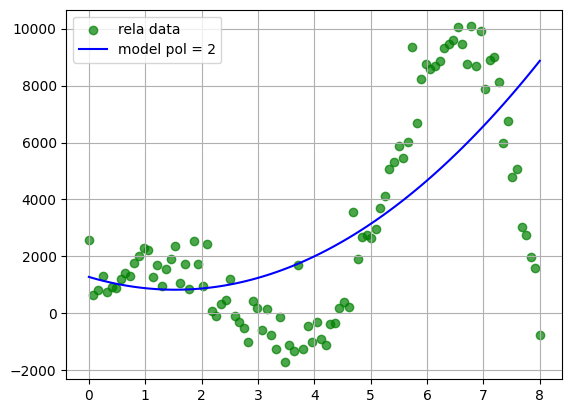

In [11]:
x = np.linspace(0,8, 100)
b = 500
w = 6
y = x * x * 200 * np.cos(x) + 8*x + b + abs(np.random.normal(700, 1000, size = 100))

plt.grid(True)

plt.scatter(x, y, label = 'rela data', alpha = 0.7, color = 'g')

plt.plot(x, model.predict(X), label = 'model pol = 2', color = 'b')

plt.legend()
plt.show()

In [12]:
poly = PolynomialFeatures(degree=6, include_bias=False)
X = poly.fit_transform(x.reshape(-1, 1))

In [13]:
model.fit(X, df['y'])

LinearRegression()

In [14]:
mse(model.predict(X),df['y'])

456250.45441673166

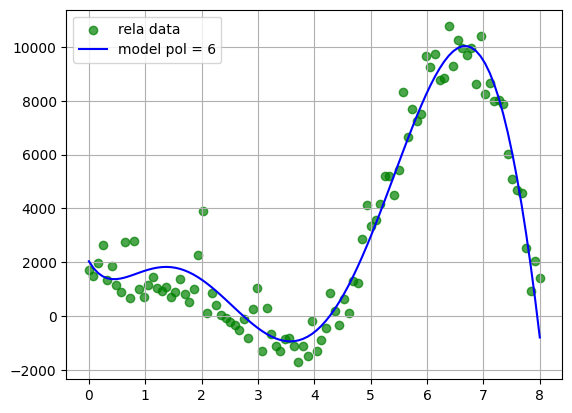

In [15]:
x = np.linspace(0,8, 100)
b = 500
w = 6
y = x * x * 200 * np.cos(x) + 8*x + b + abs(np.random.normal(700, 1000, size = 100))

plt.grid(True)

plt.scatter(x, y, label = 'rela data', alpha = 0.7, color = 'g')

plt.plot(x, model.predict(X), label = 'model pol = 6', color = 'b')

plt.legend()
plt.show()

In [16]:
poly = PolynomialFeatures(degree=35, include_bias=False)
X = poly.fit_transform(x.reshape(-1, 1))

In [17]:
model.fit(X, df['y'])

LinearRegression()

In [18]:
mse(model.predict(X),df['y'])

963926.5535535072

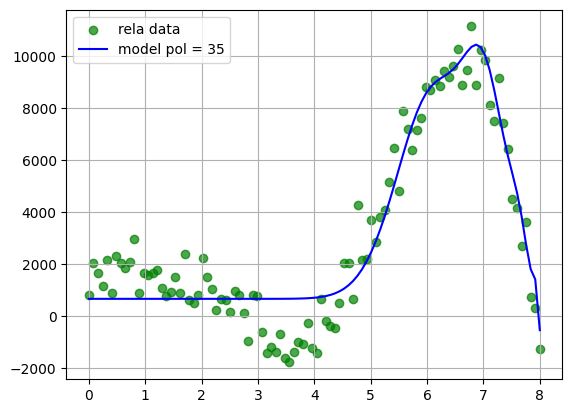

In [19]:
x = np.linspace(0,8, 100)
b = 500
w = 6
y = x * x * 200 * np.cos(x) + 8*x + b + abs(np.random.normal(700, 1000, size = 100))

plt.grid(True)

plt.scatter(x, y, label = 'rela data', alpha = 0.7, color = 'g')

plt.plot(x, model.predict(X), label = 'model pol = 35', color = 'b')

plt.legend()
plt.show()